In [1]:
import os
os.chdir("AML/")

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model, metrics
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
import chardet
import pandas as pd
with open("Advertising.csv", 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

print(result['encoding'])
df = pd.read_csv('Advertising.csv', encoding=result['encoding'])
df.head()

ascii


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

/home/arkaprava/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


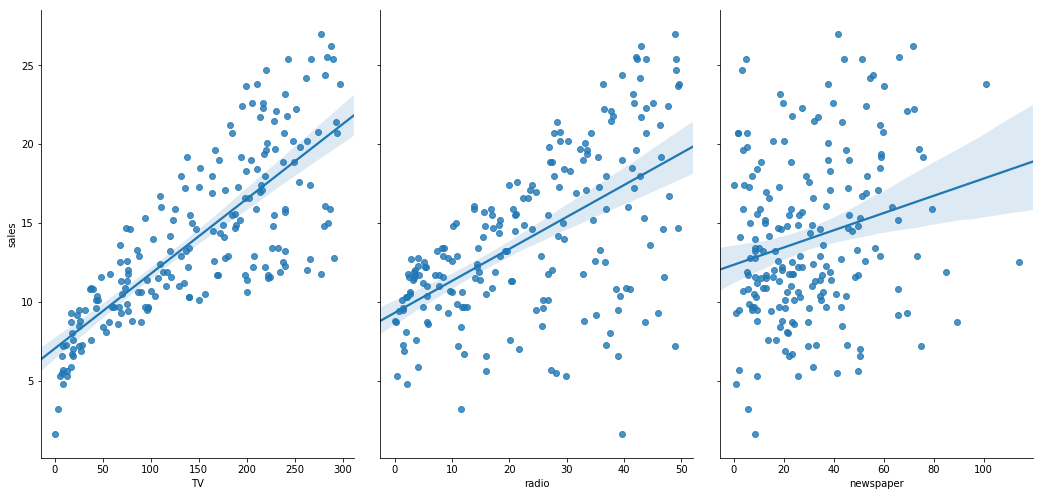

In [5]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

Sales shows an increasing relationship with TV and radio. Sales vs Newspaper show no signs of association.

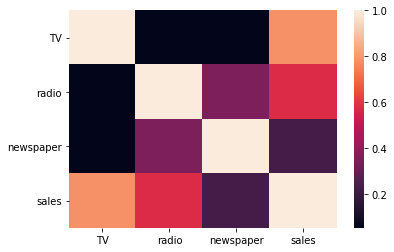

In [6]:
import seaborn as sns
df = df.loc[:,'TV':'sales']
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Sales shows a very low correlation with newspaper. Hence newspaper may not be a good feature in predicting sales.**

In [7]:
reg = smf.ols(formula='sales ~ TV', data=df).fit()
reg.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [8]:
reg.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [9]:
reg.rsquared

0.611875050850071

In [10]:
multi_reg = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
multi_reg.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [11]:
multi_reg.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [12]:
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        20:20:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm.rsquared

0.8971942610828957

In [14]:
multi_reg = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
multi_reg.rsquared

0.8972106381789522

**Here we see that the additional feature newspaper has very little effect on the 
r_squared. Also the pvalue of the coefficient of newspaper is 0.859. Hence we accept 
the null hypothesis that the coefficient is equal to zero.**

In [15]:
# Finding MSE with Newspaper in model
from sklearn.linear_model import LinearRegression
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


In [16]:
# Finding MSE without Newspaper in model
X = df[['TV', 'radio']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


In [17]:
lm_interactn = smf.ols(formula='sales ~ TV * radio', data=df).fit()
lm_interactn.rsquared

0.9677905498482523

**The interaction term TV:radio gives a considerable increase in r_squared.**

In [18]:
lm_interactn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          6.68e-146
Time:                        20:20:07   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""